<a href="https://colab.research.google.com/github/MariaZharova/3-day-intensive/blob/main/%D0%9C%D0%B0%D1%80%D0%B0%D1%84%D0%BE%D0%BD_%D0%BF%D0%BE_DS%2C_%D0%B4%D0%B5%D0%BD%D1%8C_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

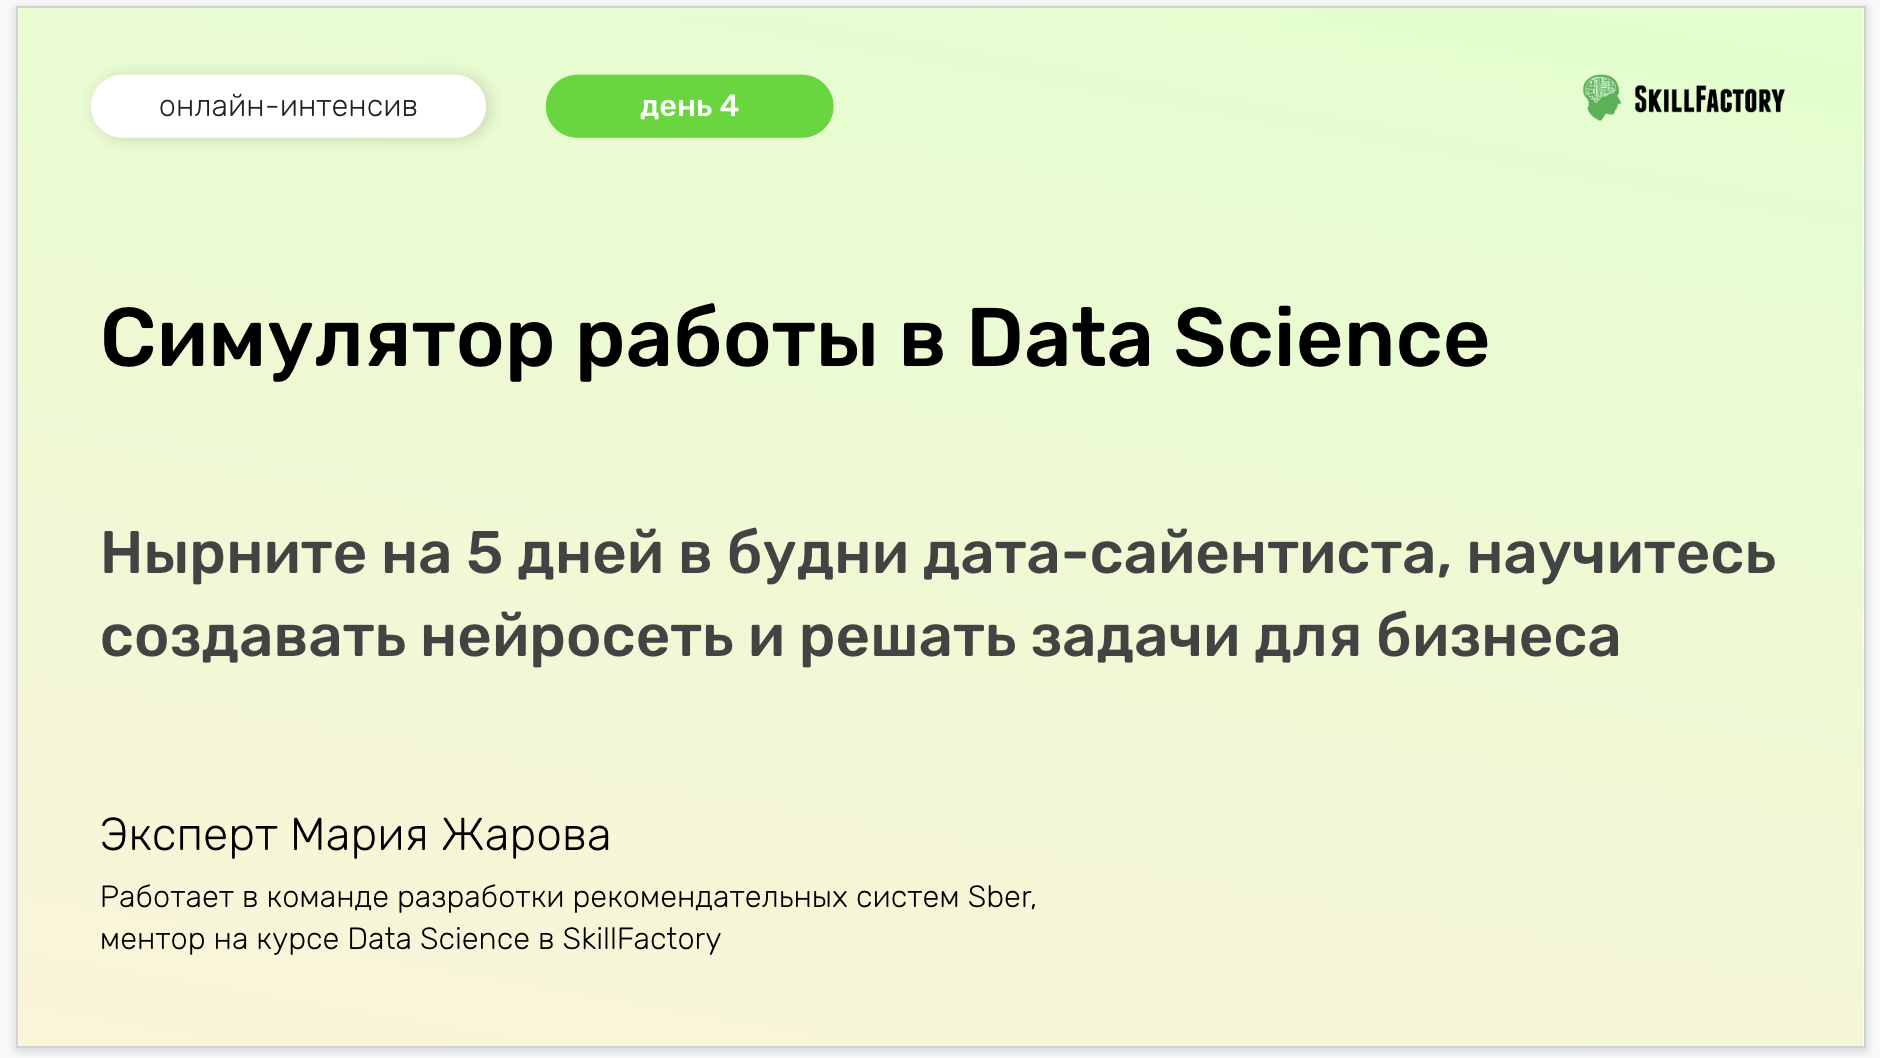

# Что такое машинное обучение и глубокое обучение?

### ⛳ Machine learning и Deep learning – это 2 подмножества искусственного интеллекта:

- ML связан с созданием алгоритмов, которые могут изменять себя без вмешательства человека для получения желаемого результата - путем подачи себя через структурированные данные.
- В DL алгоритмы создаются и функционируют аналогично ML, но устроены они более сложно - существует множество уровней этих алгоритмов, каждый из которых обеспечивает различную интерпретацию данных, которые он передает. Такая сеть алгоритмов называется искусственными нейронными сетями. Простыми словами, это напоминает нейронные связи, которые имеются в человеческом мозге.





### ⛳ Более практическое объяснение работы ML:

- Имеем табличные данные: назовём колонки-характеристики $x_1,\; x_2\;, ..., x_N$, колонку-ответ $Y$ (пусть есть в числовом и бинарном формате):
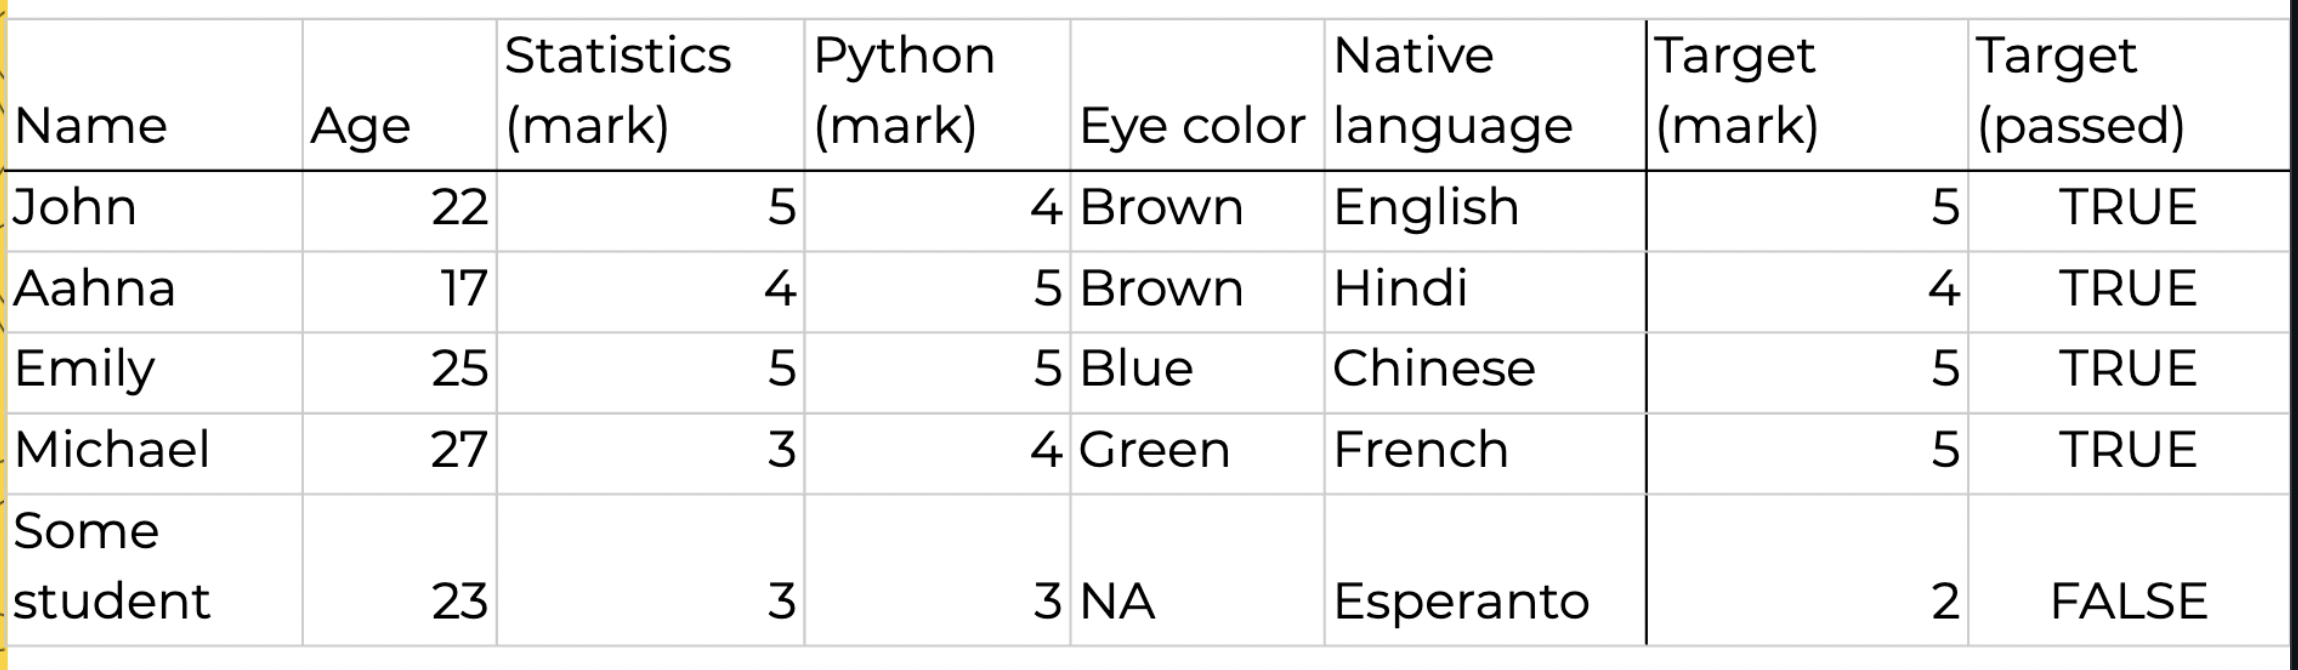


- Цель: написать алгоритм (модель машинного обучения), который бы как можно точнее предсказывал Target, видя только столбцы-характеристики. Например, очень популярный подход - подобрать такие коэффициенты $a_1, a_2, ..., a_N$, чтобы сумма $x_1\cdot a_1 + ... + x_N\cdot a_N$ максимально точно приближала истинный ответ Target (пытаемся вывести закономерности, понять, какие столбцы влияют на итоговый ответ больше всего).

- Все задачи в ML и DL можно разделить на два больших типа: классификация (когда множество значений таргета ограничено) и регресиия (таргет - любое действительное число)
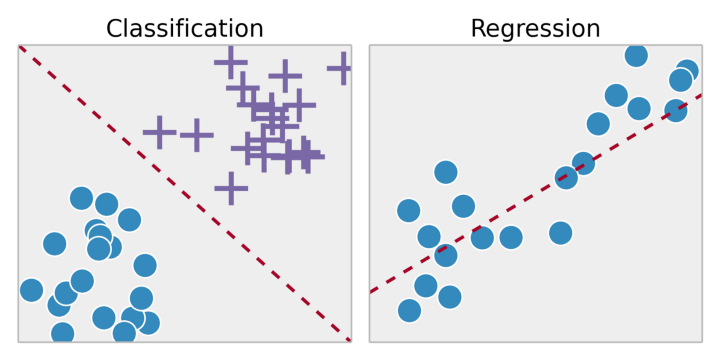

- Для решения таких задач предсказания используются широко известные алгоритмы (модели), которые реализованы в библиотеках Python (например, sklearn). Перейдём к коду и посмотрим на них :) 

In [2]:
# выгрузка нужных библиотек

# для обработки файлов
import pandas as pd
import numpy as np

# для визаулизации
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# для машинного обучения
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

## 🏠 Задача на файле Mall Customers


In [17]:
# считываем данные по ссылке
data = pd.read_csv('https://raw.githubusercontent.com/MariaZharova/3-day-intensive/main/Mall_Customers.csv', sep = ',')

In [18]:
# посмотрим на данные
data.head()

,CustomerID,Genre,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [19]:
# сразу сделаем небольшое преобразование - переведём пол из строк в числа
# это нужно для корректной работы моделей,
# т.к. они могут обрабатывать только числовые данные
data.Genre = data.Genre.apply(lambda x: 0 if x == 'Male' else 1)

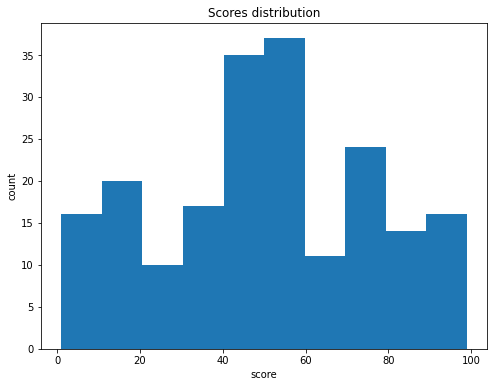

In [20]:
# Посмотрим как распределены оценки клиентов
plt.figure(figsize=(8, 6));
plt.hist(data['Score']);
plt.title('Scores distribution');
plt.xlabel('score');
plt.ylabel('count');
plt.show();

### Процесс создания, обучения модели и получение результатов

Прежде чем алгоритм сможет давать нам какие-либо предсказания, его нужно "научить" их делать - для этого модель в прямом смысле обучают: показывают ей некоторые объекты (их характеристики) и правильные ответы для них.

Также мы хотим понимать, насколько хорошо работает наш алгоритм - для этого нужен ещё один набор данных с правильными ответами, на которых мы бы уже не обучали алгоритм, но проверяли качество его работы.

Поэтому, нам нужно разделить весь набор данных на два набора:
- Тренировочный набор, на котором мы собираемся тренировать модель
- Тестовый набор, на котором мы будем тестировать нашу модель, чтобы увидеть, насколько точны ее прогнозы



In [21]:
# выделим для удобства таргет и признаки
X = data.drop('Score', axis = 1) # характеристики
y = data['Score'] # таргеты (правильные ответы)

In [22]:
# делим на данные для обучения и для теста
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Вспомним материал из начала - есть задачи классификации и регресии; у нас последнее, т.к. таргет - множество всех дейтвительных чисел. Для задачи регресии из sklearn подойдут следующие алгоритмы:
- Linear Regression 
- Lasso
- ElasticNet Regression
- Ridge Regression: 
- K Neighbors Regressor
- Decision Tree Regressor
- Simple Vector Regression (SVR)
- Ada Boost Regressor
- Gradient Boosting Regressor
- Random Forest Regression
- Extra Trees Regressor

На Python существует определённая последовательность команд для прохода по всем "жизненным циклам" модели:

1. Создание: здесь просто пишем нужное название
2. Обучение: при помощи метода fit, в аргумент подаются обучающие данные
3. Получение предсказаний: метод predict, в аргументе также подаются данные, на которых мы хотим получить поредсказания обученной модели
4. Оценка: существуют различные меткрики для оценки моделей, прописывается также название метода и в аргументы подаются истинные значения и предсказанные.


In [23]:
# пример схемы выше
reg = LinearRegression() # 1
reg.fit(X_train, y_train) # 2
y_pred = reg.predict(X_test) # 3
rmse = (np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # 4

print(f"The model performance for testing set") # красивая печать на экран :)
print(f"--------------------------------------")
print(f"Root Mean Squared Error: {rmse}")

The model performance for testing set
--------------------------------------
Root Mean Squared Error: 22.4644898676879


## ⛳ Домашняя работа

✅ Задание 1: Подумайте, это задача классификации или регресии? Напишите ответ ниже и обоснуйте его

__текстовое поле для ответа__

✅ Задание 2: На основе первого ответа попробуйте найти в документации ещё какие-нибудь модели из sklearn, подходящие для данной задачи и обучить их на том же наборе данных. Количество моделей неограниченно:) В качестве итога можете посчитать метрику mean_squared_error и выбрать наилучшую модель.

Подсказка: можно поменять только название модели в первой строке, весь остальной код будет аналогичным.

In [ ]:
# здесь можете написать Ваш код

In [ ]:
# здесь можете написать Ваш код

✅ Задание 3*: Попробуйте сделать предсказание на своих собственных данных. Можете воспользоваться приведённым шаблоном

In [24]:
# пример: внутри массива указываем через запятую
# ID (можно выдумать), пол (0 - жен, 1 - муж), возраст и сумму покупки
reg.predict(np.array([100, 1, 21, 100]).reshape(1, -1))

# ваш код здесь

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([54.71238405])

PS: Можете подумать, какая колонка является неинформативной с точки зрения обучения (соответственно, её можно удалить:))

## 🌟 Увидимся завтра! Присылайте дз на почту simulyatords@gmail.com


